In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pylab import *
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
ProdTaken =  pd.read_csv('C:/Users/dollp/Desktop/Dataset/TravelPurchased.csv')
NoProd =  pd.read_csv('C:/Users/dollp/Desktop/Dataset/nopurchase.csv')

In [ ]:
# Information on people who bought a travel package

In [31]:
ProdTaken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                866 non-null    int64  
 1   ProdTaken                 866 non-null    int64  
 2   Age                       866 non-null    int64  
 3   TypeofContact             866 non-null    object 
 4   CityTier                  866 non-null    int64  
 5   DurationOfPitch           830 non-null    float64
 6   Occupation                866 non-null    object 
 7   Gender                    866 non-null    object 
 8   NumberOfPersonVisiting    866 non-null    int64  
 9   NumberOfFollowups         858 non-null    float64
 10  ProductPitched            866 non-null    object 
 11  PreferredPropertyStar     860 non-null    float64
 12  MaritalStatus             866 non-null    object 
 13  NumberOfTrips             854 non-null    float64
 14  Passport  

In [ ]:
# information on people who did not buy a package but traveled

In [108]:
NoProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3331 entries, 0 to 3967
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                3331 non-null   int64  
 1   ProdTaken                 3331 non-null   int64  
 2   Age                       3331 non-null   int32  
 3   TypeofContact             3331 non-null   int64  
 4   CityTier                  3331 non-null   int64  
 5   DurationOfPitch           3331 non-null   float64
 6   Occupation                3331 non-null   int64  
 7   Gender                    3331 non-null   int64  
 8   NumberOfPersonVisiting    3331 non-null   int64  
 9   NumberOfFollowups         3331 non-null   float64
 10  ProductPitched            3331 non-null   int64  
 11  PreferredPropertyStar     3331 non-null   float64
 12  MaritalStatus             3331 non-null   int64  
 13  NumberOfTrips             3331 non-null   float64
 14  Passport

In [ ]:
# recode variables

In [106]:
Adj_travel = {"Gender": {"Male": 1, "Female": 2}, 
                "TypeofContact": {"Self Enquiry": 1,"Company Invited": 2},
                "Occupation": {"Salaried": 1, "Small Business": 2, "Large Business": 3, "Free Lancer": 4},
                "ProductPitched": {"Basic": 1,"Standard": 2, "Deluxe": 3, "Super Deluxe": 4, "King": 5},
                "MaritalStatus": {"Married": 1,"Single": 2,"Divorced": 3, "Unmarried": 4},
                "Designation": {"Manager": 1,"Executive": 2, "Senior Manager": 3, "AVP": 4, "VP": 5}}
ProdTaken.replace(Adj_travel, inplace=True)

In [107]:
NoProd.replace(Adj_travel, inplace=True)

In [45]:
ProdTaken.dropna(inplace=True)
NoProd.dropna(inplace=True)

In [46]:
ProdTaken.Age = np.round (ProdTaken.Age)
NoProd.Age = np.round (NoProd.Age)

In [47]:
ProdTaken.Age = ProdTaken.Age.astype(int)
NoProd.Age = NoProd.Age.astype(int)

In [48]:
ProdTaken['Occupation'].value_counts()

Salaried          359
Small Business    325
Large Business    111
Free Lancer         2
Name: Occupation, dtype: int64

In [50]:
NoProd['Occupation'].value_counts()

Salaried          1640
Small Business    1421
Large Business     270
Name: Occupation, dtype: int64

In [ ]:
# Quick glance at occupation with those who bought product and didnt buy product

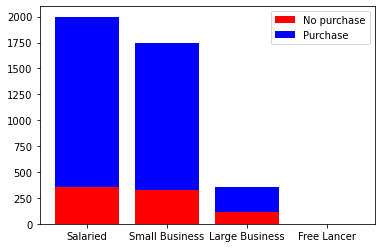

In [54]:
Jobs = ["Salaried", "Small Business", "Large Business", "Free Lancer"]
y1 = [359, 325, 111, 2]
y2 = [1640, 1421, 240, 0]
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["No purchase", "Purchase"])
plt.show()

In [97]:
ProdTaken['NumberOfTrips'].value_counts()

2.0     274
3.0     193
1.0      83
7.0      56
5.0      56
4.0      52
6.0      52
8.0      29
20.0      1
19.0      1
Name: NumberOfTrips, dtype: int64

In [100]:
NoProd['NumberOfTrips'].value_counts()

2.0     993
3.0     800
1.0     384
4.0     370
5.0     340
6.0     231
7.0     137
8.0      74
21.0      1
22.0      1
Name: NumberOfTrips, dtype: int64

In [ ]:
# number of trips varying between the two groups

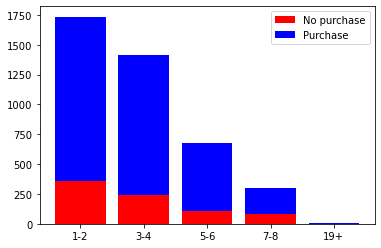

In [105]:
x = ["1-2", "3-4", "5-6", "7-8", "19+"]
y1 = [357, 245, 108, 85, 2]
y2 = [1377, 1170, 572, 211, 2]
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["No purchase", "Purchase"])
plt.show()